In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re


# Import Data

In [2]:
user = pd.read_csv('users.csv')
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [3]:
rating = pd.read_csv('ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
book = pd.read_csv('books.csv')
book

/tmp/ipykernel_1698603/758195389.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv('books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


# 1. Data Preparation and EDA for dataset user

In [5]:
# check data duplication
user.duplicated().sum()

0

In [6]:
user.Age.value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
220.0       1
143.0       1
140.0       1
189.0       1
223.0       1
Name: count, Length: 165, dtype: int64

In [7]:
user.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

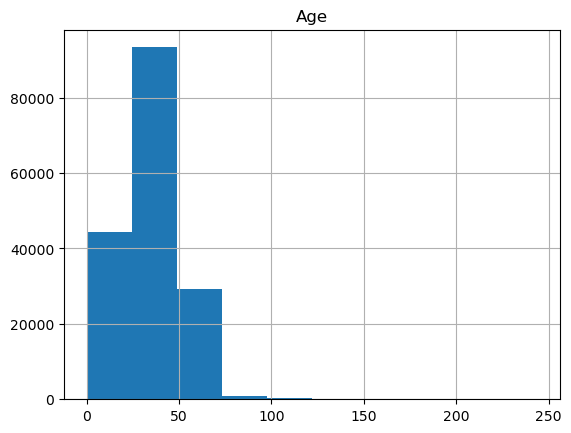

In [8]:
# age distribution before setting the age range 0-150.
user.hist(column="Age")


In [9]:
print(f"Skewness: {user['Age'].skew()}")
print(f"Kurtosis: {user['Age'].kurt()}")

Skewness: 1.178391610309946
Kurtosis: 6.044239850374936


In [10]:
#  make a new df users by selecting the users whose age are between 0 and 150.
users = user[ (user['Age']>= 0) & (user['Age'] <= 150.) ]
users

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [11]:
# add a new column, age group, to label users' age

bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']
users['AgeGroup'] = pd.cut(users['Age'], bins=bins, labels=labels, right=False)

# add a columns: Country,State,and City, to label users' country, state, and city.

users['Country'] = users['Location'].str.split(',').str[-1]
users['State'] = users['Location'].str.split(',').str[-2]
users['City'] = users['Location'].str.split(',').str[-3]

# Process the country column to only retain alphabetic letters+space+period as no country name contain numbers, special characters
users['Country'] = users['Country'].str.replace('[^a-zA-Z\.\ ]', '')
users['State'] = users['State'].str.replace('[^a-zA-Z\.\ ]', '')
users['City'] = users['City'].str.replace('[^a-zA-Z\.\ ]', '')

# strip off the leading and trailing white spaces
users['Country'] = users['Country'] .str.strip()
users['State'] = users['State'] .str.strip()
users['City'] = users['City'] .str.strip()


/tmp/ipykernel_1698603/360730300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['AgeGroup'] = pd.cut(users['Age'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_1698603/360730300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'] = users['Location'].str.split(',').str[-1]
/tmp/ipykernel_1698603/360730300.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

## get df users (aga range is 0-150), after data preparation for dataset user

In [12]:
users 

,User-ID,Location,Age,AgeGroup,Country,State,City
1,2,"stockton, california, usa",18.0,Teen,usa,california,stockton
3,4,"porto, v.n.gaia, portugal",17.0,Teen,portugal,v.n.gaia,porto
5,6,"santa monica, california, usa",61.0,Adult,usa,california,santa monica
9,10,"albacete, wisconsin, spain",26.0,Adult,spain,wisconsin,albacete
10,11,"melbourne, victoria, australia",14.0,Teen,australia,victoria,melbourne
...,...,...,...,...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0,Adult,canada,ontario,georgetown
278850,278851,"dallas, texas, usa",33.0,Adult,usa,texas,dallas
278851,278852,"brisbane, queensland, australia",32.0,Adult,australia,queensland,brisbane
278852,278853,"stranraer, n/a, united kingdom",17.0,Teen,united kingdom,n/a,stranraer


## users' age distribution

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

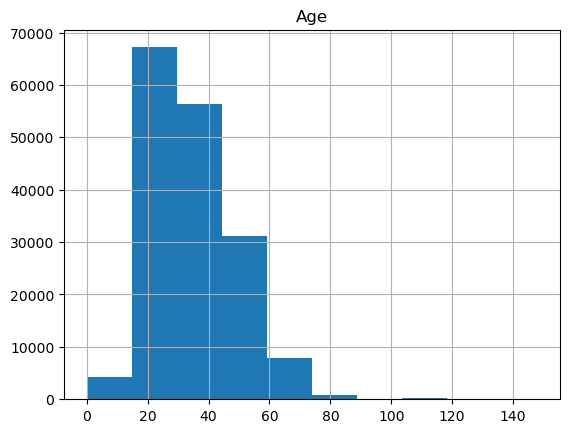

In [13]:
users.hist(column="Age")

<Axes: title={'center': 'users distribution per age group '}, xlabel='AgeGroup'>

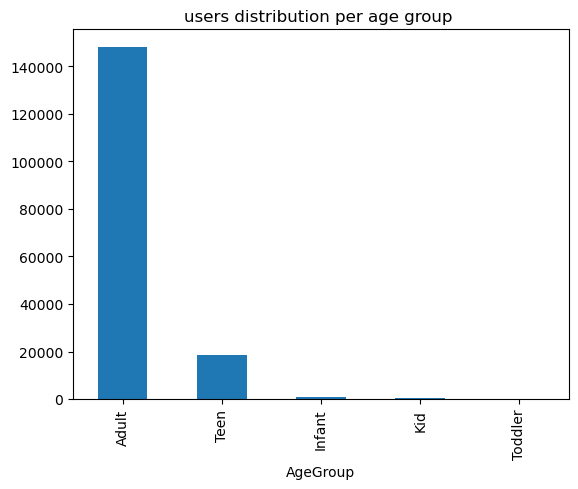

In [14]:
users['AgeGroup'].value_counts().plot(kind='bar', title="users distribution per age group ")

## top 30 users countries

<Axes: title={'center': 'top 30 user countries'}, xlabel='Country'>

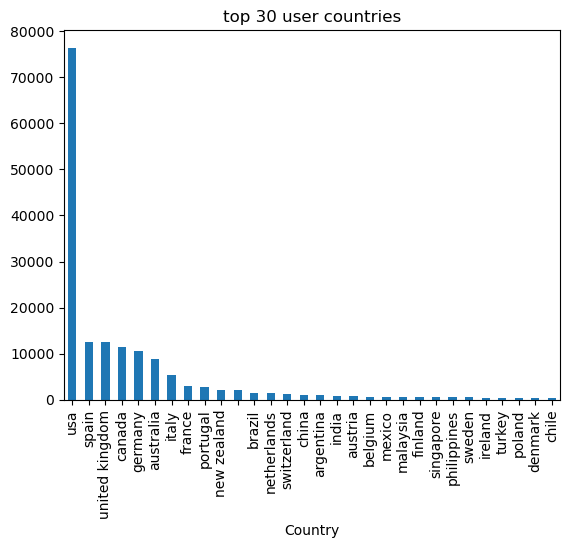

In [15]:
(users['Country'].value_counts()[:30]).plot(kind='bar', title="top 30 user countries")

In [16]:
#users.pivot_table(index='AgeGroup', columns='Country', aggfunc='size').plot.barh()

# 2. Data Preparation and EDA for rating

In [17]:
# check data duplication
rating.duplicated().sum()


0

In [18]:
# count of book rating group by User-ID and ISBN
rating_counts = rating.groupby(['User-ID','ISBN']).size()

In [19]:
# mean of book rating group by User-ID
rating_mean_user = rating.groupby('User-ID')['Book-Rating'].mean()
rating_mean_user

User-ID
2         0.000000
7         0.000000
8         2.166667
9         2.000000
10        3.000000
            ...   
278846    4.000000
278849    2.250000
278851    3.956522
278852    8.000000
278854    5.250000
Name: Book-Rating, Length: 105283, dtype: float64

In [20]:
# count of book rating group by ISBN
rating_count_user = rating.groupby('User-ID')['Book-Rating'].count()
rating_count_user

User-ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 105283, dtype: int64

In [21]:
# merge rating_mean and rating_count
user_rating = pd.concat([rating_count_user, rating_mean_user], axis=1)
user_rating.columns = ['book_rating_counts', 'book_rating']

## get df book rating per users after data preparation for dataset rating

In [22]:
user_rating

,book_rating_counts,book_rating
User-ID,,
2,1,0.000000
7,1,0.000000
8,18,2.166667
9,3,2.000000
10,2,3.000000
...,...,...
278846,2,4.000000
278849,4,2.250000
278851,23,3.956522


<Axes: xlabel='book_rating_counts', ylabel='book_rating'>

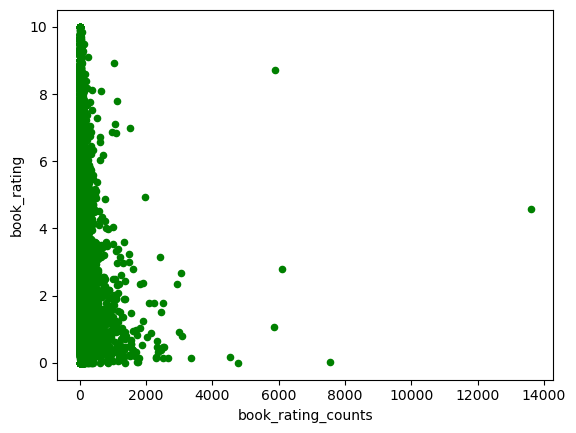

In [23]:
# check the outliers and correlation between book_rating_counts and book_rating per users
user_rating.plot.scatter(x='book_rating_counts', y='book_rating',c='Green')

In [24]:
# mean of book rating group by ISBN
rating_mean_isbn = rating.groupby('ISBN')['Book-Rating'].mean()
rating_mean_isbn 

ISBN
 0330299891    3.0
 0375404120    1.5
 0586045007    0.0
 9022906116    3.5
 9032803328    0.0
              ... 
cn113107       0.0
ooo7156103     7.0
§423350229     0.0
´3499128624    8.0
Ô½crosoft      7.0
Name: Book-Rating, Length: 340556, dtype: float64

In [25]:
# count of book rating group by ISBN
rating_count_isbn = rating.groupby('ISBN')['Book-Rating'].count()
rating_count_isbn 

ISBN
 0330299891    2
 0375404120    2
 0586045007    1
 9022906116    2
 9032803328    1
              ..
cn113107       1
ooo7156103     1
§423350229     1
´3499128624    1
Ô½crosoft      1
Name: Book-Rating, Length: 340556, dtype: int64

In [26]:
# merge rating_mean and rating_count
isbn_rating = pd.concat([rating_count_isbn, rating_mean_isbn], axis=1)
isbn_rating.columns = ['book_rating_counts', 'book_rating']

## get df book rating per ISBN after data preparation for dataset rating

In [27]:
isbn_rating

,book_rating_counts,book_rating
ISBN,,
0330299891,2,3.0
0375404120,2,1.5
0586045007,1,0.0
9022906116,2,3.5
9032803328,1,0.0
...,...,...
cn113107,1,0.0
ooo7156103,1,7.0
§423350229,1,0.0


In [28]:
isbn_rating[isbn_rating['book_rating_counts']==1]

,book_rating_counts,book_rating
ISBN,,
0586045007,1,0.0
9032803328,1,0.0
9044922564,1,0.0
9044922572,1,0.0
9044922718,1,0.0
...,...,...
cn113107,1,0.0
ooo7156103,1,7.0
§423350229,1,0.0


<Axes: xlabel='book_rating_counts', ylabel='book_rating'>

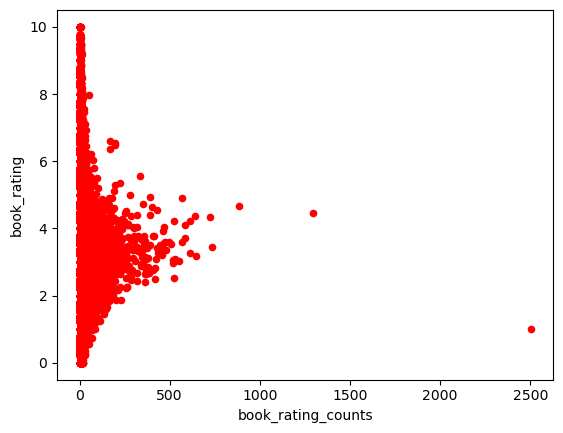

In [29]:
# check the outliers and correlation between book_rating_counts and book_rating per users
from scipy.sparse import coo_matrix

isbn_rating.plot.scatter(x='book_rating_counts', y='book_rating',c='Red')

# 3. Data Preparation and EDA for book

In [30]:
# check data duplication
book.duplicated().sum()

0

In [31]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [32]:
# Group by Year-Of-Publication and diognose the unnormal rows
book.groupby(['Year-Of-Publication']).count()


,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,
0,3570,3570,3570,3570,3570,3570,3570
1806,1,1,1,1,1,1,1
1900,1,1,1,1,1,1,1
1901,7,7,7,7,7,7,7
1902,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2024,1,1,1,1,1,1,1
2030,3,3,3,3,3,3,3
2037,1,1,1,1,1,1,1


In [33]:
# locate the unnormal data values
book[book['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
     

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [34]:
# shift the unnormal data row to right
book.iloc[209538, :] = book.iloc[209538, :].shift()
book.iloc[220731, :] = book.iloc[220731, :].shift()
book.iloc[221678, :] = book.iloc[221678, :].shift()

In [35]:
# groupby the Year-Of-Publication after correcting the unnormal rows
book.groupby(['Year-Of-Publication']).count()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,
0,3570,3570,3570,3570,3570,3570,3570
1806,1,1,1,1,1,1,1
1900,1,1,1,1,1,1,1
1901,7,7,7,7,7,7,7
1902,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2012,1,1,1,1,1,1,1
2020,1,1,1,1,1,1,1
2024,1,1,1,1,1,1,1


<Axes: title={'center': 'number of books by year'}, xlabel='Year-Of-Publication'>

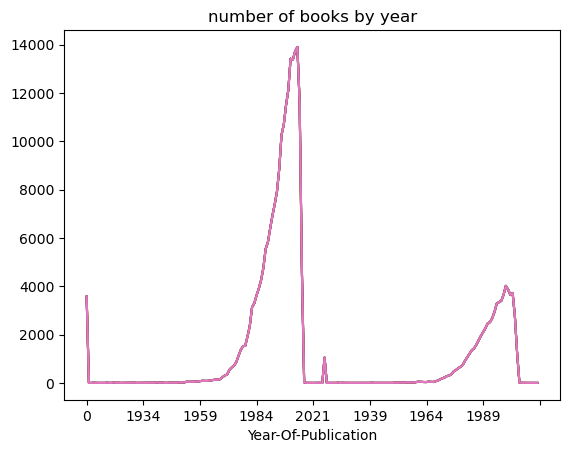

In [36]:
# plot the number of books by year
book.groupby(['Year-Of-Publication']).count().plot(legend=False, title = 'number of books by year')

In [37]:
book.groupby(['Book-Author']).count()

,ISBN,Book-Title,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Author,,,,,,,
D. Chiel,1,1,1,1,1,1,1
J. D. Landis,1,1,1,1,1,1,1
Mimma Balia,1,1,1,1,1,1,1
'N Sync,1,1,1,1,1,1,1
142 moms from all over the world,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Â¢ystein LÂ²nn,1,1,1,1,1,1,1
Ã?dÃ¶n von HorvÃ¡th,3,3,3,3,3,3,3
Ã?Â?dÃ?Â¶n von Horvath,1,1,1,1,1,1,1


In [38]:
book.groupby(['Publisher']).count()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,Image-URL-M,Image-URL-L
Publisher,,,,,,,
Editions P. Terrail,1,1,1,1,1,1,1
Tri-State Press,1,1,1,1,1,1,1
'K' Pub,1,1,1,1,1,1,1
"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1,1,1,1,1,1,1
"(49 Poland St., W.1), BPC Unit 75",1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Ã?lbaum,1,1,1,1,1,1,1
Ã?sterreichische Staatsdruckerei,1,1,1,1,1,1,1
Ã?sterreichischer Bundesverlag,1,1,1,1,1,1,1


## Benchmark model

In [39]:
!pip install surprise

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from surprise import Dataset, Reader, BaselineOnly
from surprise.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
from surprise import accuracy

In [41]:
unique_user_ids = rating['User-ID'].unique()
train_user_ids, test_user_ids = train_test_split(unique_user_ids, test_size=0.2, random_state=42)

train_set = rating[rating['User-ID'].isin(train_user_ids)]
test_set = rating[rating['User-ID'].isin(test_user_ids)]

common_values = train_set['User-ID'].isin(test_set['User-ID'])
if common_values.any():
    print("The two Series share some common values.")
else:
    print("The two Series do not share any common values.")

The two Series do not share any common values.


In [42]:
reader = Reader(rating_scale=(0,10))
train_data = Dataset.load_from_df(train_set[['User-ID', 'ISBN', 'Book-Rating']], reader)
test_data = Dataset.load_from_df(test_set[['User-ID', 'ISBN', 'Book-Rating']], reader)

algo = BaselineOnly()
cross_validate(algo, train_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# predictions = baseline_model.test()
# cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.4069  3.4020  3.4098  3.4064  3.4111  3.4072  0.0031  
MAE (testset)     2.8145  2.8089  2.8170  2.8154  2.8190  2.8150  0.0034  
Fit time          4.55    4.73    4.95    4.94    4.99    4.83    0.17    
Test time         1.20    1.09    0.69    1.07    1.49    1.11    0.26    


{'test_rmse': array([3.40689089, 3.40201846, 3.40979682, 3.40643983, 3.41109192]),
 'test_mae': array([2.81454804, 2.80890071, 2.81704389, 2.81544799, 2.81904708]),
 'fit_time': (4.546689748764038,
  4.726487159729004,
  4.950592279434204,
  4.941735506057739,
  4.991949081420898),
 'test_time': (1.1996567249298096,
  1.0868465900421143,
  0.6889619827270508,
  1.074725866317749,
  1.4923632144927979)}

In [43]:
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()

algo.fit(trainset)

predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f'RMSE on test set: {rmse}')
print(f'MAE on test set: {mae}')

Estimating biases using als...
RMSE: 3.8094
MAE:  3.5707
RMSE on test set: 3.809400185238536
MAE on test set: 3.5707103905920454


## SVD

In [44]:
from surprise import SVD

In [45]:
%%time

svd = SVD()
param_grid = {'n_factors': [5, 10, 20],
              'n_epochs': [3, 5, 10],
              'lr_all': [0.003, 0.005, 0.01],
              'reg_all': [0.03, 0.1, 0.3]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
grid_search.fit(train_data)

best_params = grid_search.best_params['rmse']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_factors': 5, 'n_epochs': 5, 'lr_all': 0.01, 'reg_all': 0.1}
CPU times: user 3min 54s, sys: 23.8 s, total: 4min 18s
Wall time: 4min 28s


In [46]:
final_model = SVD(**best_params)
final_model.fit(trainset)

predictions = final_model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 3.8039
MAE:  3.5640


## NMF

In [47]:
%%time
from surprise import NMF

nmf = NMF()
param_grid = {'n_factors': [10, 20, 30],
              'n_epochs': [20, 30, 40],
              'reg_pu': [0.06, 0.08, 0.1],
              'reg_qi': [0.06, 0.08, 0.1]}
grid_search = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
grid_search.fit(train_data)

best_params = grid_search.best_params['rmse']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_factors': 30, 'n_epochs': 40, 'reg_pu': 0.1, 'reg_qi': 0.1}
CPU times: user 4min 5s, sys: 27.2 s, total: 4min 32s
Wall time: 5min 9s


In [48]:
final_model = NMF(**best_params)
final_model.fit(trainset)

# Make predictions on the test set
predictions = final_model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 3.8220
MAE:  3.5615


## Memory based

In [55]:
rating_fq = rating.groupby(['User-ID']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(rating_fq)
rating_fq = rating_fq[rating_fq['count'] >= 5]
sampled_uids = rating_fq['User-ID'].unique()
len(sampled_uids)

       User-ID  count
4213     11676  13602
74815   198711   7550
58113   153662   6109
37356    98391   5891
13576    35859   5850
...        ...    ...
64504   171043      1
64508   171052      1
64509   171054      1
37969   100027      1
64477   170988      1

[105283 rows x 2 columns]


22816

In [58]:
user["usa".isin(user["Location"].str)]

AttributeError: 'str' object has no attribute 'isin'